In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("amazon.csv", encoding='iso-8859-1', parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df["number"].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [6]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
f"Tem {df.shape[0]} linhas e {df.shape[1]} colunas no dataset"

'Tem 6454 linhas e 5 colunas no dataset'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fires_per_year = df.groupby('year')['number'].sum().reset_index()
fires_per_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


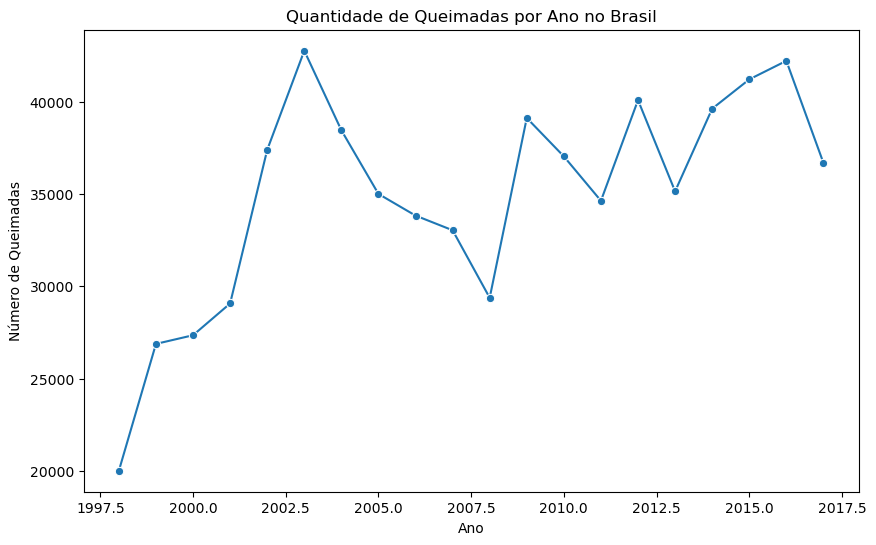

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=fires_per_year, x='year', y='number', marker='o')
plt.title('Quantidade de Queimadas por Ano no Brasil')
plt.ylabel('Número de Queimadas')
plt.xlabel('Ano')
plt.show()

In [12]:
fires_per_month = df.groupby('month', observed=False)['number'].sum().reset_index()
fires_per_month

,month,number
0,Abril,28188.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30848.050
4,Janeiro,47747.844
5,Julho,92326.113
6,Junho,56010.675
7,Maio,34731.363
8,Março,30717.405
9,Novembro,85508.054


In [13]:
print(fires_per_month['month'].unique())
df['month'] = df['month'].str.strip().str.lower()

['Abril' 'Agosto' 'Dezembro' 'Fevereiro' 'Janeiro' 'Julho' 'Junho' 'Maio'
 'Março' 'Novembro' 'Outubro' 'Setembro']


In [14]:
meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 
         'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
df['month'] = pd.Categorical(df['month'], categories=meses, ordered=True)
fires_per_month = df.groupby('month', observed=False)['number'].sum().reset_index()
fires_per_month

,month,number
0,janeiro,47747.844
1,fevereiro,30848.050
2,março,30717.405
3,abril,28188.770
4,maio,34731.363
5,junho,56010.675
6,julho,92326.113
7,agosto,88050.435
8,setembro,58578.305
9,outubro,88681.579


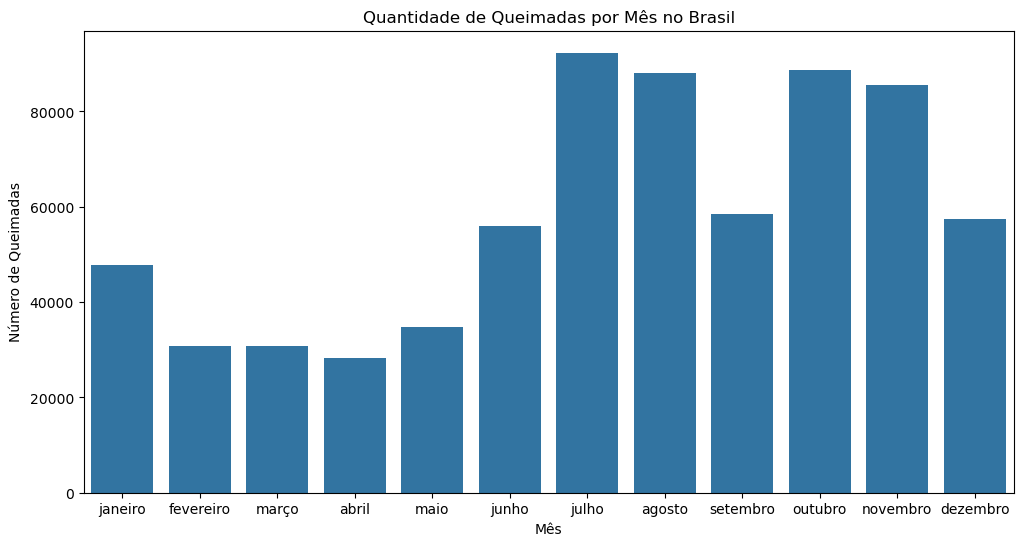

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fires_per_month, x='month', y='number')
plt.title('Quantidade de Queimadas por Mês no Brasil')
plt.ylabel('Número de Queimadas')
plt.xlabel('Mês')
plt.show()

In [16]:
fires_per_state = df.groupby('state')['number'].sum().reset_index()

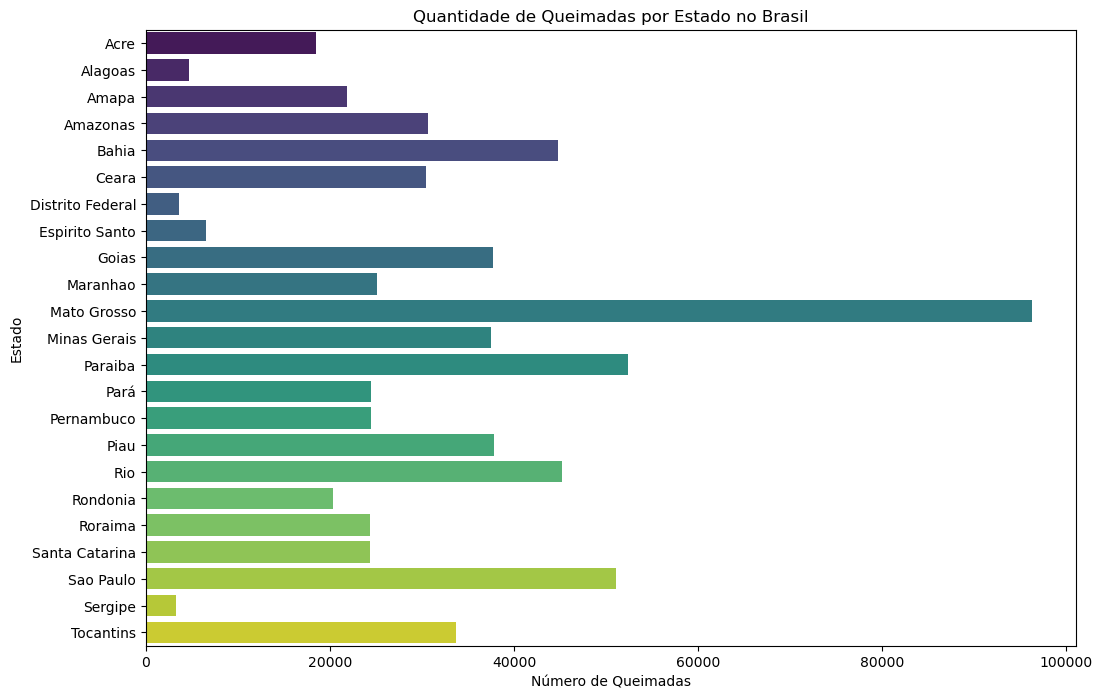

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=fires_per_state, y='state', x='number', hue='state',palette='viridis', legend=False)
plt.title('Quantidade de Queimadas por Estado no Brasil')
plt.ylabel('Estado')
plt.xlabel('Número de Queimadas')
plt.show()

In [19]:
states_fires = df.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'number', ascending = True)

states_fires

,state,number
9,Amazonas,30650.129
8,Tocantins,33707.885
7,Minas Gerais,37475.258
6,Goias,37695.520
5,Piau,37803.747
4,Bahia,44746.226
3,Rio,45160.865
2,Sao Paulo,51121.198
1,Paraiba,52435.918
0,Mato Grosso,96246.028


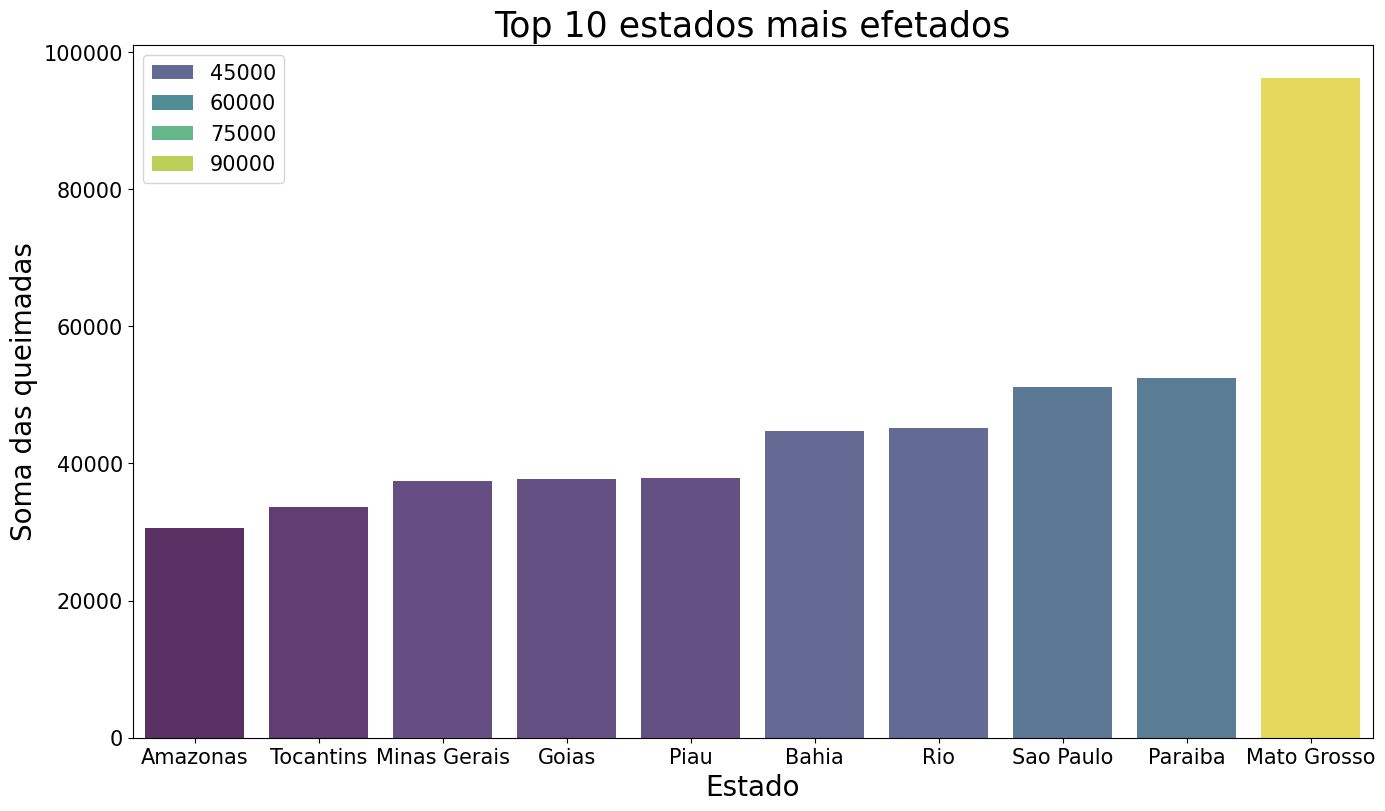

In [22]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = states_fires['state'], y=states_fires['number'], hue=states_fires['number'],  palette="viridis", alpha=0.85)

plt.title("Top 10 estados mais efetados", fontsize = 25)
plt.xlabel("Estado", fontsize = 20)
plt.ylabel("Soma das queimadas", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)